# Лабораторная работа №6

## Сети Кохонена

Выполнил Попов Матвей

Группа М8О-408Б-20

Вариант 21

### Цель работы

Исследование свойств слоя Кохонена, карты Кохонена, а также сетей
векторного квантования, обучаемых с учителем, алгоритмов обучения, а также 
применение сетей в задачах кластеризации и классификации.


### Сценарий работы


Импортируем необходимые библиотеки

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import tqdm

Зададим входные данные

In [52]:
data = [
    [-1.2, -0.8], 
    [0.5, 1], 
    [1.4, -0.9], 
    [0.7, 0.2], 
    [-0.3, 0],
    [-0.1, 0.4],
    [0.7, -0.6],
    [-1.3, 0.9],
    [-0.4, 0.8],
    [-1, 1.2],
    [1.2, 1.1],
    [1.4, 1],
]


Реализуем класс сети Кохонена для кластеризации точек

In [53]:
class Kohonen:
    def __init__(self, features, width, height):
        self._features = features
        self._width = width
        self._height = height
        self._weights = np.random.randn(width * height, features)
        self._distances = np.zeros((width * height, width * height))

        kohonen_map = np.array([[x, y] for y in range(height) for x in range(width)])
        for i, p in enumerate(kohonen_map):
            self._distances[i] = np.linalg.norm(kohonen_map - p, axis=1)        

    def train(self, data, epoch=50):
        start_ef_width = max(self._width, self._height) / 2
        ef_width_rate = epoch / np.log(start_ef_width)
        shuffle_data = copy.copy(data)

        for i in tqdm.tqdm(range(epoch)):
            np.random.shuffle(shuffle_data)
            ef_width = start_ef_width * np.exp(-i / ef_width_rate)
            lr = np.exp(-i / epoch)

            for x in shuffle_data:
                x_distances = np.linalg.norm(self._weights - x, axis=1)
                win_point = np.argmin(x_distances)

                for i, d in enumerate(self._distances[win_point]):
                    tn = np.exp(-d**2 / (2 * ef_width**2))
                    self._weights[i] += (x - self._weights[i]) * lr * tn

    @property
    def reshape_weights(self):
        return np.array(self._weights.reshape((self._height,self._width, self._features)))

    @property
    def scale_weights(self):
        return ((self._weights - np.min(self._weights, axis=0)) / (np.max(self._weights, axis=0) - np.min(self._weights, axis=0))).reshape((self._height, self._width, self._features))


Создадим и обучим модель

In [54]:
model = Kohonen(2, 50, 50)

model.train(data)

100%|██████████| 50/50 [00:12<00:00,  3.94it/s]


Проверим модель в действии

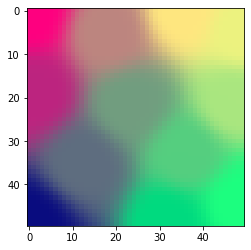

In [55]:
plt.imshow(np.insert(model.scale_weights, 2, 0.5, axis = 2))

## Вывод

Проделав лабораторную работу, я решил задачу кластеризации с помощью карты 
Кохонена.
